# Appendix

# Introduction

## Calculating evolutionarily stable strategies of the signaling game

First, we import `sympy` a library for symbolic math on its way towards being a full-fledged open-source computer algebra system.

In [1]:
from sympy import *
from sympy.stats import Beta, density

Next, we define the symbols that we'll use in constructing the utility functions and the prior probability.

In [2]:
t, t_0, m_0, m_1, a_0, a_1, b = symbols('t t_0 m_0 m_1 a_0 a_1 b')
T = Beta("t", 1, 2)

Then, we build the actual utility functions and the respective expected utilities. Note that we can save a bit of effort by noting that the speaker's utility is defined by the hearer's response and the hearer's utility is the speaker's where $b=0$.

In [3]:
Utility_S_0 = 1 - (a_0 - t - (1-t)*b)**2
Utility_S_1 = 1 - (a_1 - t - (1-t)*b)**2
E_Utility_S = integrate(Utility_S_0*density(T)(t).evalf(), (t, 0, t_0)) + \
                integrate(Utility_S_1*density(T)(t).evalf(), (t, t_0, 1))
E_Utility_R = E_Utility_S.subs(b, 0)

Now, we can differentiate the utility functions by the actions available to speakers and hearers, and solve for the values that maximize the expected utilities.

In [4]:
t0_sol = Eq(solve(diff(E_Utility_S, t_0), t_0)[0], t_0)
a0_sol = Eq(solve(diff(E_Utility_R, a_0), a_0)[0], a_0)
a1_sol = Eq(solve(diff(E_Utility_R, a_1), a_1)[0], a_1)

This can take a bit of time, so by default we've supplied the set of solutions to this system of equations. Note that there are two solutions because we haven't supplied the information to the solver that the values are constrained to be positive. In fact, we are only interested in the second solution that yields an ESS.

In [5]:
# %time ESS = solve([t0_sol, a0_sol, a1_sol], [t_0, a_0, a_1])

In [6]:
ESS = [((9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b - (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b - sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0)), ((9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0), 0.333333333333333*(-3.0 + 2.0*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/((-2.0 + (9.0*b + (9.0*b**2 - 18.0*b + 5.0)**0.5 - 3.0)/(6.0*b - 2.0))*(6.0*b - 2.0)), 0.333333333333333 + 0.666666666666667*(9.0*b + sqrt(9.0*b**2 - 18.0*b + 5.0) - 3.0)/(6.0*b - 2.0))]

Next, we can solve for the degree of speaker bias that will lead to the use of a single message. That is, if $b > \frac{1}{6}$, then only $ne...not$ will be used.

We can visualize this result in the following manner.

In [8]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
hfont = {'fontname':'Times New Roman'}

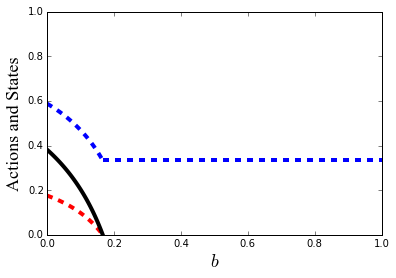

In [10]:
x = np.linspace(0,1/6.0, num=100)
plt.plot(x, [ESS[1][1].subs(b, value).evalf() for value in x], 'r', linewidth=4, linestyle='--')
plt.plot(x, [ESS[1][2].subs(b, value).evalf() for value in x], 'b', linewidth=4, linestyle='--')
plt.plot(x, [ESS[1][0].subs(b, value).evalf() for value in x], 'k', linewidth=4)
plt.axhline(1/3.0, 1/6.0, 1, color='b', linewidth=4, ls='--')
plt.ylim(0,1)
plt.xlim(0,1)
plt.xlabel(r"$b$", fontsize=18, **hfont)
plt.ylabel(r"Actions and States", fontsize=18, **hfont)
plt.savefig("../local/out/ESS-beta.pdf", format='pdf', dpi=1000, fontsize=18)
plt.show()

In [11]:
[item.subs(b, 0).evalf() for item in ESS[1]]

[0.381966011250105, 0.175954681666807, 0.587977340833403]

In [7]:
solve(ESS[1][0], b)[0]

0.166666666666667

# Fitting the dynamic model to historical corpus data

In [1]:
%load_ext rpy2.ipython

In [2]:
%%R
library(ggplot2, quietly=T)
library(dplyr, quietly=T)
library(reshape2, quietly=T)
neg.data.full = read.csv("../data/digs15-negative-priming/data/neg-data.csv", header=T)
neg.data.full = tbl_df(neg.data.full)

//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: 
Attaching package: ‘dplyr’


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:stats’:

    filter, lag


  res = super(Function, self).__call__(*new_args, **new_kwargs)
//anaconda/lib/python2.7/site-packages/rpy2/robjects/functions.py:106: UserWarning: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


  res = super(Function, self).__call__(*new_args, **new_kwargs)


In [42]:
%%R
# Filter out tokens without do-support label, year, or type
excluded.texts = c("CMORM","CMBOETH","CMNTEST","CMOTEST")
# CMBOETH : translation of Boethius' "Consolation of Philosophy", which is notably stilted
# CMORM   : Ormulum is very specific poetic format
# CMOTEST, CMNTEST : Old and new testaments
neg.data = neg.data.full %>% 
            filter(finite != "-") %>%
            filter(clausetype != "imperative") %>%
            filter(exclude != "only") %>%
            filter(exclude != "constituent") %>%
            filter(exclude != "contraction") %>%
            filter(exclude != "coordination") %>%
            filter(exclude != "concord") %>%
            filter(exclude != "X") %>%
            filter(! author %in% excluded.texts) %>%
            mutate(stages = ifelse(has.both, 2, ifelse(has.ne, 1, 3))) %>%
            select(year, author, stages)

In [43]:
%%R
neg.data

Source: local data frame [5,475 x 3]

    year  author stages
   (int)  (fctr)  (dbl)
1   1400 CMAELR3      3
2   1400 CMAELR3      3
3   1400 CMAELR3      3
4   1400 CMAELR3      3
5   1400 CMAELR3      3
6   1400 CMAELR3      3
7   1400 CMAELR3      3
8   1400 CMAELR3      3
9   1400 CMAELR3      2
10  1400 CMAELR3      3
..   ...     ...    ...


In [44]:
%%R
floor(log(nrow(neg.data)))

[1] 8


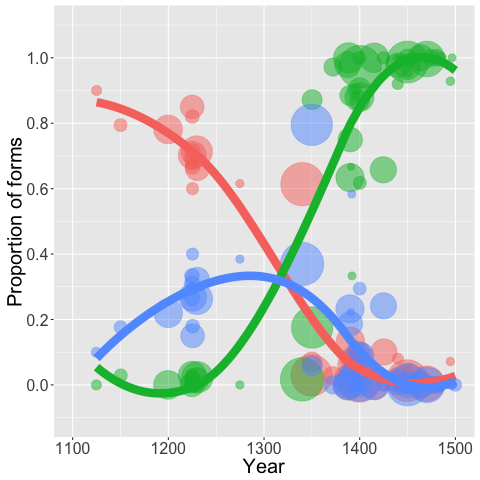

In [45]:
%%R
#neg.data = neg.data.full %>% filter(! author %in% excluded.texts)
neg.plot.data =  neg.data %>% group_by(year, author) %>% 
    summarize(total=n(), ne=sum(stages==1, na.rm=TRUE)/total,
              not=sum(stages==3, na.rm=TRUE)/total,
              ne.not=sum(stages==2, na.rm=TRUE)/total)
neg.plot.data = melt(neg.plot.data, id=c("year", 'author', "total"))

ggplot(aes(x = year, y = value, color = variable), data = neg.plot.data) +
  geom_point(aes(size = total), alpha = 0.5, position = position_jitter()) +
  geom_smooth(method="loess", se = F, size=4) + #, aes(weight = log(total))) + #aes(weight = total), 
  scale_x_continuous(name="Year", limits=c(1100, 1500)) +
  scale_y_continuous(name="Proportion of forms", breaks=seq(0,1,.2)) +   scale_size_area("N", max_size = 20) +
  theme(text = element_text(size=20), legend.position="none") +  
  coord_cartesian(ylim = c(-.1,1.1))
#ggsave('../local/out/neg-year-lines.pdf', height=6, width=9)


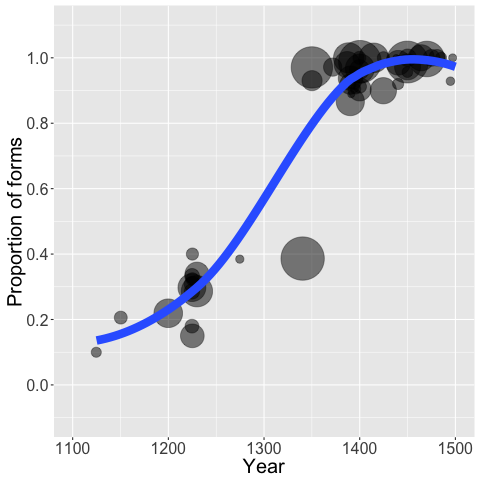

In [46]:
%%R
# Compare ne to ne...not and not
first.data = neg.data %>% group_by(year) %>% mutate(value = as.integer(! stages==1)) %>% select(year, author, value)
first.plot.data = first.data %>% group_by(year, author) %>% 
    summarize(p = sum(value)/n(), total=n())
ggplot(aes(x = year, y = p), data = first.plot.data) +
  geom_point(aes(size = total), alpha = 0.5, position = position_jitter()) +
  geom_smooth(method="loess", se = F, size=4) + 
  scale_x_continuous(name="Year", limits=c(1100, 1500)) +   
  scale_y_continuous(name="Proportion of forms", breaks=seq(0,1,.2)) +
  theme(text = element_text(size=20)) + theme(legend.position="none") +
  scale_size_area("N", max_size = 20) +  coord_cartesian(xlim = c(1090,1540)) + coord_cartesian(ylim = c(-.1,1.1))
#ggsave('../local/out/lump-plot1.pdf', height=6, width=9)

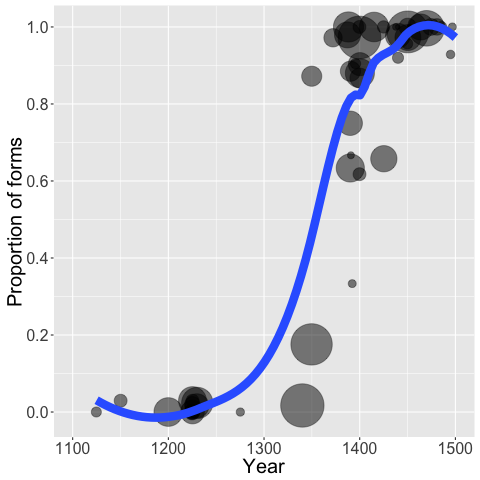

In [47]:
%%R
# Compare ne to ne...not and not
second.data = neg.data %>% group_by(year) %>% mutate(value = as.integer(stages==3)) %>% select(year, author, value)
second.plot.data = second.data %>% group_by(year, author) %>% 
    summarize(p = sum(value)/n(), total=n())
ggplot(aes(x = year, y = p), data = second.plot.data) +
  geom_point(aes(size = total), alpha = 0.5, position = position_jitter()) +
  geom_smooth( method="loess", span=.5, se = FALSE, size=4) + 
  scale_x_continuous(name="Year", limits=c(1100, 1500)) +   
  scale_y_continuous(name="Proportion of forms", breaks=seq(0,1,.2)) +
  theme(text = element_text(size=20)) + theme(legend.position="none") +
  scale_size_area("N", max_size = 20) 
#ggsave('../local/out/lump-plot2.pdf', height=6, width=9)

In [33]:
%%R
source('helper.R')

$FIT.p
[1] 0.0315055

$FIT.stat
[1] 2.554397

$Y.bar
[1] 0.02805404

$q
[1] 6

$mu
[1] 912

$sigma
[1] 195

$W.stat
        W 
0.8424442 

$W.p
[1] 0.1717921



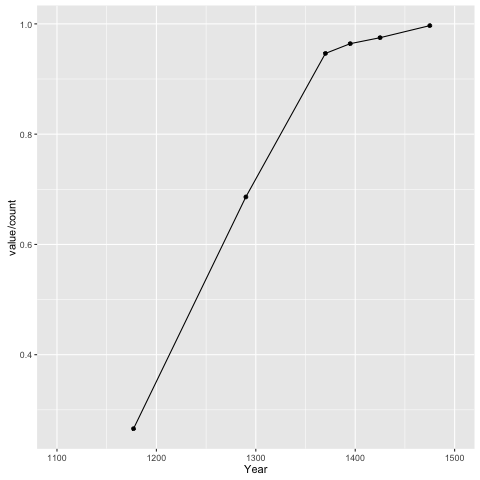

In [64]:
%%R
first.data.binned = bin.by.quantile(first.data, 6)
p = ggplot(aes(x = year, y = value/count), data = first.data.binned) +
  geom_point() + geom_line() + 
  scale_x_continuous(name="Year", limits=c(1100, 1500))
print(p)
FIT.test(adjust.absorption(first.data.binned), one.sided=T)

Source: local data frame [7 x 3]

   year value count
  (int) (int) (int)
1  1177    15  1106
2  1290   148   889
3  1369   410   415
4  1394  1093  1279
5  1412   319   370
6  1437   773   788
7  1475   626   628
$FIT.p
[1] 0.3026795

$FIT.stat
[1] 0.5509832

$Y.bar
[1] 0.0260203

$q
[1] 7

$mu
[1] 782

$sigma
[1] 339

$W.stat
        W 
0.9399162 

$W.p
[1] 0.6585235



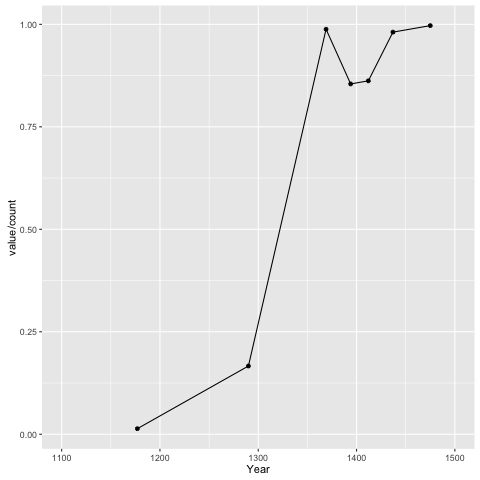

In [65]:
%%R
second.data.binned = bin.by.quantile(second.data, 7)
print(second.data.binned)
p = ggplot(aes(x = year, y = value/count), data = second.data.binned) +
  geom_point() + geom_line() + 
  scale_x_continuous(name="Year", limits=c(1100, 1500))
print(p)
FIT.test(adjust.absorption(second.data.binned), one.sided=T)

In [71]:
%%R
first = first.data

In [72]:
first = %Rget first

## Defining the evolutionary game dynamics

Next, we define the discrete-time behavioral replicator dynamics outlined in Huttegger and Hofbauer (2015). The basic intuition is that we treat each state and each message *as if* it were its own population. This reduces calculating the dynamics to matrix multiplication.

In [73]:
from scipy.integrate import odeint
from scipy.optimize import minimize
from scipy.special import beta as beta_func
from scipy.misc import comb
def beta_binomial(n, alpha, beta):
    return np.matrix([comb(n-1,k) * beta_func(k+alpha, n-1-k+beta) / beta_func(alpha,beta) for k in range(n)])
def beta_binomial_expectation(prior):
    return sum([prior[i]*i/len(prior) for i in range(len(prior))])

In [74]:
def U_S(state, action, b):
    return 1 - (action - state - (1-state)*b)**2
    #return 1 - abs(action - state - (1-state)*b)
def U_R(state, action):
    return 1 - (action - state)**2
# Define functions to map integers to interval [0,1]
def t(i, n):
    return i/float(n)
def a(i, n):
    return i/float(n)

In [75]:
def discrete_time_replicator_dynamics(n_steps, X, Y, A, B, P):
    """Calculate the discrete-time replicator dynamics for"""
    # Get the number of states, signals, and actions
    X_nrow = X.shape[0]
    X_ncol = X.shape[1]
    Y_nrow = Y.shape[0] # Same as X_ncol
    Y_ncol = Y.shape[1] # Often, but not necessarily, the same as X_nrow
    # Create empty arrays to hold the population states over time
    X_t = np.empty(shape=(n_steps, X_nrow*X_ncol), dtype=float)
    Y_t = np.empty(shape=(n_steps, X_nrow*X_ncol), dtype=float)
    # Set the initial state
    X_t[0,:] = X.ravel()
    Y_t[0,:] = Y.ravel()
    # Iterate forward over (n-1) steps
    for i in range(1,n_steps):
        # Get the previous state
        X_prev = X_t[i-1,:].reshape(X_nrow, X_ncol)
        Y_prev = Y_t[i-1,:].reshape(Y_nrow, Y_ncol)
        # Calculate the scaling factors
        E_X = A * Y_prev.T
        X_bar = (((A * Y_prev.T) * X_prev.T).diagonal()).T
        X_hat = E_X / X_bar
        # 
        C = np.divide(np.multiply(P.T, X_prev), (P * X_prev)[0])
        E_Y = (B.T * C).T
        Y_bar = ((E_Y*Y_prev.T).diagonal()).T
        Y_hat = np.divide(E_Y, Y_bar)
        # Calculate next states
        X_t[i,:] = np.multiply(X_prev, X_hat).ravel()
        Y_t[i,:] = np.multiply(Y_prev, Y_hat).ravel()
    return X_t, Y_t

In [76]:
import pandas as pd
import numpy as np

In [77]:
func_data = pd.DataFrame({'year':np.array(first[0], dtype=int),'value':np.array(first[2], dtype=int)})

In [78]:
df = func_data

In [79]:
def loss_function_ls(params, df):
    # Unpack the paramters
    a_x = params[0] # Sender initial state parameter
    b_y1 = params[1] # Receiver response to m1 parameter
    b_y2 = params[2] # Receiver response to m2 parameter
    b_p = params[3]
    b = params[4] # This 
    k=1 # Change this to alter scaling parameter
    # Construct initial states
    # Number of states and actions
    number = 200
    # Define prior probability
    prior = beta_binomial(number, 1, b_p)
    P = np.repeat(prior, 2, axis=0)
    # Define payoff matrices
    A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
    B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])
    # Define sender population
    X0_m2 = beta_binomial(number, a_x, 1)#b_x)
    X0_m1 = 1 - X0_m2
    X0 = np.vstack((X0_m1, X0_m2)).T
    # Calculate expected state given m2
    p_ti_m2 = np.multiply(X0[:,1], prior.T)
    p_m2 = prior * X0[:,1]
    p_t_m2 = p_ti_m2 / p_m2
    E_t_m2 = (np.array(range(number)) * p_t_m2) / number
    scale = E_t_m2[0,0]/(1 - E_t_m2[0,0])
    # Define receiver population
    Y0 = np.vstack((beta_binomial(number, (1/float(b_p))*b_y1, b_y1), beta_binomial(number, scale*b_y2, b_y2)))
    # Y0 = np.vstack((beta_binomial(number, (1/float(2))*b_y1, b_y1), beta_binomial(number, scale*b_y2, b_y2)))
    # Iterate through the discrete-time replicator dynamics
    X_sol, Y_sol = discrete_time_replicator_dynamics(376, X0, Y0, A, B, P)
    # Get p(m_2) over time
    m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
    # Get data indices
    indices = np.subtract(df.year.unique(), min(df.year))
    # Get count of tokens for indices
    counts = df.groupby('year').size() #.loc[index + 1125]
    # Get count of value==1 for indices
    values = df.groupby('year').aggregate(np.sum)
    # Initialize RSS value
    RSS = 0
    # Loop over indices
    for index in indices:
        zero_count = counts.loc[index + min(df.year)] - values.loc[index + min(df.year), 'value']
        one_count = values.loc[index + min(df.year), 'value']
        #
        RSS += zero_count*(0 - m2_sol[index])**2 + one_count*(1 - m2_sol[index])**2
    return RSS

In [80]:
from functools import partial
f = partial(loss_function_ls, df=func_data)

In [378]:
%%time
fit = minimize(f, method="COBYLA",
                  x0=np.array([20, 2, 2, 10, 1/6.0]),
                  #bounds=((1, 100), (1, 100), (1, 100), (1, 100), (0,1)), 
                  constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 300, "disp" : True})
print fit
# a_x = params[0] # Sender initial state parameter
# b_y1 = params[1] # Receiver response to m1 parameter
# b_y2 = params[2] # Receiver response to m2 parameter
# b_p = params[3] # Beta prior parameter
# b = params[4] # This 

     fun: 690.5609624054199
   maxcv: 0.0
 message: 'Optimization terminated successfully.'
    nfev: 64
  status: 1
 success: True
       x: array([ 15.58202686,   1.63868557,   3.53057048,   9.5122923 ,   0.44902475])
CPU times: user 35 s, sys: 507 ms, total: 35.5 s
Wall time: 18.8 s


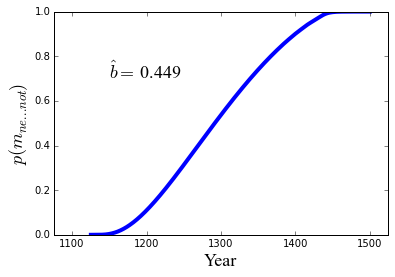

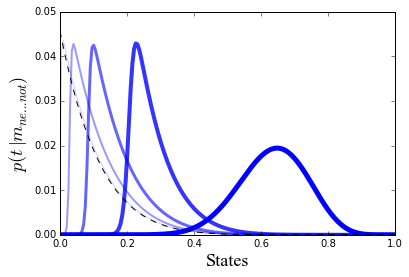

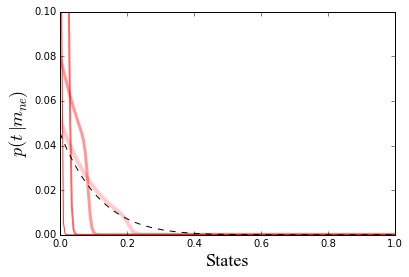

In [379]:
number=200
b = fit.x[4]
prior = beta_binomial(number, 1, fit.x[3])
A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])
# Define sender population
X0_m2 = beta_binomial(number,  fit.x[0], 1)
X0_m1 = 1 - X0_m2
X0 = np.vstack((X0_m1, X0_m2)).T
P = np.repeat(prior, 2, axis=0)
#
p_ti_m2 = np.multiply(X0[:,1], prior.T)
p_m2 = prior * X0[:,1]
p_t_m2 = p_ti_m2 / p_m2
E_t_m2 = (np.array(range(number)) * p_t_m2) / number
scale = E_t_m2[0,0]/(1 - E_t_m2[0,0])
# Define receiver population
Y0 = np.vstack((beta_binomial(number, (1/fit.x[3])*fit.x[1], fit.x[1]),\
              beta_binomial(number, scale*fit.x[2], fit.x[2])))
# Solve and plot
X_sol, Y_sol = discrete_time_replicator_dynamics(376, X0, Y0, A, B, P)
m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
#
years = [1125 + item for item in range(376)]
plt.plot(years, m2_sol, 'b', linewidth=4)
plt.ylim(0,1)
plt.xlim(1075, 1525)
plt.xlabel('Year', fontsize=18, **hfont)
plt.ylabel(r'$p(m_{ne...not})$', fontsize=18)
plt.text(1150, .7, r'$\hat{b} = $' + " " + "%.3f" % fit.x[4], fontsize=18, **hfont)
#plt.savefig("../local/out/m2.pdf", format='pdf', dpi=1000)
plt.show()
#
timesteps=376
states = np.linspace(0,1, num=200)
for j, i in enumerate(range(1,timesteps, timesteps/5)):
    p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
    p_m2 =  X_sol[i,1::2] * prior.T
    p_t_m2 = p_ti_m2 / p_m2
    plt.plot(states, p_t_m2.tolist()[0], color='b', linewidth=5-j, alpha=(1 - (i/float(timesteps))))
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne...not})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
#plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()

for j, i in enumerate(range(1,timesteps, timesteps/5)):
    p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
    p_m1 =  X_sol[i,0::2] * prior.T
    p_t_m1 = p_ti_m1 / p_m1
    plt.plot(states, p_t_m1.tolist()[0], color='r', linewidth=5-j, alpha=(i/float(timesteps)))
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
plt.ylim(0,.1)
#plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()

In [ ]:
%%time
fit_TNC = minimize(f, method="TNC",
                  x0=np.array([20, 2, 2, 10, 1/6.0]),
                  bounds=((1, 100), (1, 100), (1, 100), (1, 100), (0,1)), 
                  #constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 1000, "disp" : True})
print fit_TNC
# a_x = params[0] # Sender initial state parameter
# b_y1 = params[1] # Scaling of receiver response to m1
# b_y2 = params[2] # Scaling of receiver response to m2
# b_p = params[3] # Beta prior parameter
# b = params[4] # bias parameter

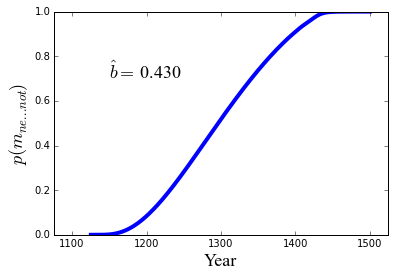

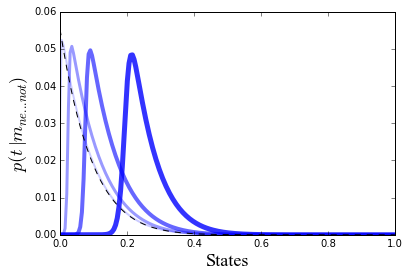

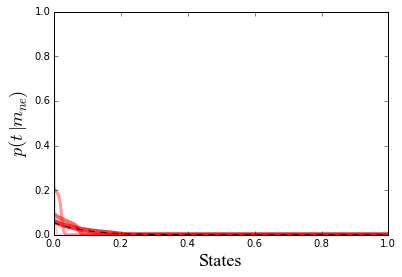

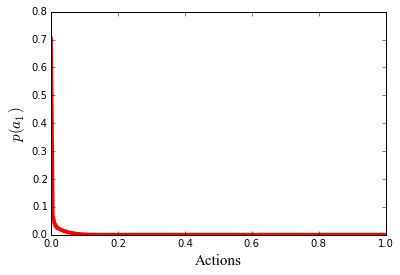

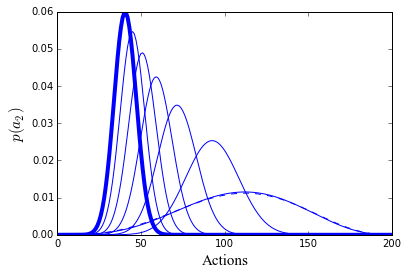

In [381]:
fit = fit_TNC
number=200
b = fit.x[4]
prior = beta_binomial(number, 1, fit.x[3])
A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])
# Define sender population
X0_m2 = beta_binomial(number,  fit.x[0], 1)
X0_m1 = 1 - X0_m2
X0 = np.vstack((X0_m1, X0_m2)).T
P = np.repeat(prior, 2, axis=0)
#
p_ti_m2 = np.multiply(X0[:,1], prior.T)
p_m2 = prior * X0[:,1]
p_t_m2 = p_ti_m2 / p_m2
E_t_m2 = (np.array(range(number)) * p_t_m2) / number
scale = E_t_m2[0,0]/(1 - E_t_m2[0,0])
# Define receiver population
Y0 = np.vstack((beta_binomial(number, (1/fit.x[3])*fit.x[1], fit.x[1]),\
              beta_binomial(number, scale*fit.x[2], fit.x[2])))
# Solve and plot
X_sol, Y_sol = discrete_time_replicator_dynamics(376, X0, Y0, A, B, P)
m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
#
years = [1125 + item for item in range(376)]
plt.plot(years, m2_sol, 'b', linewidth=4)
plt.ylim(0,1)
plt.xlim(1075, 1525)
plt.xlabel('Year', fontsize=18, **hfont)
plt.ylabel(r'$p(m_{ne...not})$', fontsize=18)
plt.text(1150, .7, r'$\hat{b} = $' + " " + "%.3f" % fit.x[4], fontsize=18, **hfont)
#plt.savefig("../local/out/m2.pdf", format='pdf', dpi=1000)
plt.show()
#
timesteps=376
states = np.linspace(0,1, num=200)
for j, i in enumerate(range(75,timesteps, timesteps/5)):
    p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
    p_m2 =  X_sol[i,1::2] * prior.T
    p_t_m2 = p_ti_m2 / p_m2
    plt.plot(states, p_t_m2.tolist()[0], color='b', linewidth=5-j, alpha=(1 - (i/float(timesteps))))
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne...not})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
#plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()

for j, i in enumerate(range(75,timesteps, timesteps/5)):
    p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
    p_m1 =  X_sol[i,0::2] * prior.T
    p_t_m1 = p_ti_m1 / p_m1
    plt.plot(states, p_t_m1.tolist()[0], color='r', linewidth=5-j, alpha=(1 - (i/float(timesteps))))
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
#plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()

for i in range(1,timesteps, timesteps/6):
    plt.plot(states, Y_sol[i,:200], color='r', alpha=(i/float(timesteps)))
plt.plot(states, Y_sol[0,:200], 'r--')
plt.plot(states, Y_sol[-1,:200], 'r', linewidth=4)
plt.ylabel(r'$p(a_1)$', fontsize=15, **hfont)
plt.xlabel('Actions', fontsize=15, **hfont)
#plt.savefig("a1_rd.eps", format='eps', dpi=1000)
plt.show()
for i in range(1,timesteps, timesteps/6):
    plt.plot(Y_sol[i,200:], color='b')
plt.plot(Y_sol[0,200:], 'b--')
plt.plot(Y_sol[-1,200:], 'b', linewidth=4)
plt.ylabel(r'$p(a_2)$', fontsize=15, **hfont)
plt.xlabel('Actions', fontsize=15, **hfont)
#plt.savefig("a2_rd.eps", format='eps', dpi=1000)
plt.show()

In [382]:
%%time
fit_BFGS = minimize(f, method="L-BFGS-B",
                  x0=np.array([10, 1, 1, 10, 1/6.0]),
                  bounds=((1, 100), (1, 100), (1, 100), (1, 100), (0,1)), 
                  #constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 300, "disp" : True})
print fit_BFGS
# a_x = params[0] # Sender initial state parameter
# b_y1 = params[1] # Receiver response to m1 parameter
# b_y2 = params[2] # Receiver response to m2 parameter
# b_p = params[3] # Beta prior parameter
# b = params[4] # This 

      fun: 682.90468037725373
 hess_inv: <5x5 LbfgsInvHessProduct with dtype=float64>
      jac: array([ -2.91606739e-02,   5.30963007e-01,   1.13686838e-04,
         1.79625204e-03,  -4.77484718e-03])
  message: 'CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH'
     nfev: 570
      nit: 76
   status: 0
  success: True
        x: array([ 100.        ,    1.        ,   99.99998587,    4.49655336,
          0.7866548 ])
CPU times: user 4min 30s, sys: 2.46 s, total: 4min 32s
Wall time: 2min 18s


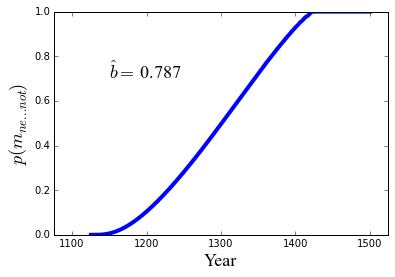

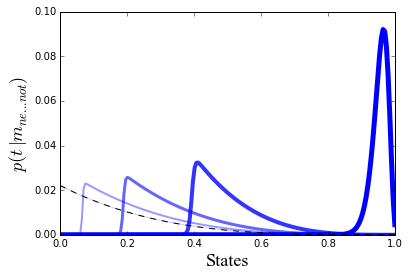

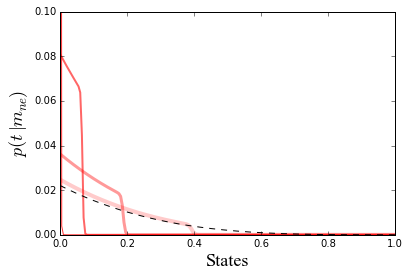

In [383]:
fit = fit_BFGS
number=200
b = fit.x[4]
prior = beta_binomial(number, 1, fit.x[3])
A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])
# Define sender population
X0_m2 = beta_binomial(number,  fit.x[0], 1)
X0_m1 = 1 - X0_m2
X0 = np.vstack((X0_m1, X0_m2)).T
P = np.repeat(prior, 2, axis=0)
#
p_ti_m2 = np.multiply(X0[:,1], prior.T)
p_m2 = prior * X0[:,1]
p_t_m2 = p_ti_m2 / p_m2
E_t_m2 = (np.array(range(number)) * p_t_m2) / number
scale = E_t_m2[0,0]/(1 - E_t_m2[0,0])
# Define receiver population
Y0 = np.vstack((beta_binomial(number, (1/fit.x[3])*fit.x[1], fit.x[1]),\
              beta_binomial(number, scale*fit.x[2], fit.x[2])))
# Solve and plot
X_sol, Y_sol = discrete_time_replicator_dynamics(376, X0, Y0, A, B, P)
m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
#
years = [1125 + item for item in range(376)]
plt.plot(years, m2_sol, 'b', linewidth=4)
plt.ylim(0,1)
plt.xlim(1075, 1525)
plt.xlabel('Year', fontsize=18, **hfont)
plt.ylabel(r'$p(m_{ne...not})$', fontsize=18)
plt.text(1150, .7, r'$\hat{b} = $' + " " + "%.3f" % fit.x[4], fontsize=18, **hfont)
#plt.savefig("../local/out/m2.pdf", format='pdf', dpi=1000)
plt.show()
#
timesteps=376
states = np.linspace(0,1, num=200)
for j, i in enumerate(range(1,timesteps, timesteps/5)):
    p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
    p_m2 =  X_sol[i,1::2] * prior.T
    p_t_m2 = p_ti_m2 / p_m2
    plt.plot(states, p_t_m2.tolist()[0], color='b', linewidth=5-j, alpha=(1 - (i/float(timesteps))))
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne...not})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
#plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()
for j, i in enumerate(range(1,timesteps, timesteps/5)):
    p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
    p_m1 =  X_sol[i,0::2] * prior.T
    p_t_m1 = p_ti_m1 / p_m1
    plt.plot(states, p_t_m1.tolist()[0], color='r', linewidth=5-j, alpha=(i/float(timesteps)))
plt.plot(states, prior.tolist()[0], 'k--')
plt.ylabel(r'$p(t \mid m_{ne})$', fontsize=18)
plt.xlabel('States', fontsize=18, **hfont)
plt.ylim(0,.1)
#plt.savefig("../local/out/pt-m2.pdf", format='pdf', dpi=1000)
plt.show()

In [ ]:
p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
p_m1 =  X_sol[i,0::2] * prior.T
p_t_m1 = p_ti_m1 / p_m1
ax1.plot(states, p_t_m1.tolist()[0], 'r')
p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
p_m2 =  X_sol[i,1::2] * prior.T
p_t_m2 = p_ti_m2 / p_m2
ax1.plot(states, p_t_m2.tolist()[0], 'b')
ax1.plot(states, prior.tolist()[0], 'k--')
ax1.text(.8, .03, str(1125+i)+' CE', **hfont)


/home/cahern/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=10.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)
/home/cahern/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:1292: UserWarning: findfont: Could not match :family=Bitstream Vera Sans:style=normal:variant=normal:weight=normal:stretch=normal:size=15.0. Returning /usr/share/matplotlib/mpl-data/fonts/ttf/cmb10.ttf
  UserWarning)


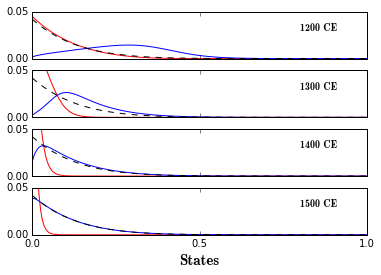

In [45]:
# Push-chain
this_fig, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True, sharey=True)
i=75
p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
p_m1 =  X_sol[i,0::2] * prior.T
p_t_m1 = p_ti_m1 / p_m1
ax1.plot(states, p_t_m1.tolist()[0], 'r')
p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
p_m2 =  X_sol[i,1::2] * prior.T
p_t_m2 = p_ti_m2 / p_m2
ax1.plot(states, p_t_m2.tolist()[0], 'b')
ax1.plot(states, prior.tolist()[0], 'k--')
ax1.text(.8, .03, str(1125+i)+' CE', **hfont)
#ax.annotate('Test', xy=(1, 0), xycoords='axes fraction', fontsize=16,
 #               horizontalalignment='right', verticalalignment='bottom')
#ax1.set_ylabel('common xlabel')
#ax1.ylim(0,.1)
#plt.show()
#
i=175
#plt.subplot(3,2,1)
p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
p_m1 =  X_sol[i,0::2] * prior.T
p_t_m1 = p_ti_m1 / p_m1
ax2.plot(states, p_t_m1.tolist()[0], 'r')
p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
p_m2 =  X_sol[i,1::2] * prior.T
p_t_m2 = p_ti_m2 / p_m2
ax2.plot(states, p_t_m2.tolist()[0], 'b')
ax2.plot(states, prior.tolist()[0], 'k--')
ax2.text(.8, .03, str(1125+i)+' CE', **hfont)
#ax2.ylim(0,.1)
#plt.show()
#
i=275
#plt.subplot(3,3,1)
p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
p_m1 =  X_sol[i,0::2] * prior.T
p_t_m1 = p_ti_m1 / p_m1
ax3.plot(states, p_t_m1.tolist()[0], 'r')
p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
p_m2 =  X_sol[i,1::2] * prior.T
p_t_m2 = p_ti_m2 / p_m2
ax3.plot(states, p_t_m2.tolist()[0], 'b')
ax3.plot(states, prior.tolist()[0], 'k--')
ax3.text(.8, .03, str(1125+i)+' CE', **hfont)
#
i=375
#plt.subplot(3,3,1)
p_ti_m1 = np.multiply(X_sol[i,0::2], prior)
p_m1 =  X_sol[i,0::2] * prior.T
p_t_m1 = p_ti_m1 / p_m1
ax4.plot(states, p_t_m1.tolist()[0], 'r')
p_ti_m2 = np.multiply(X_sol[i,1::2], prior)
p_m2 =  X_sol[i,1::2] * prior.T
p_t_m2 = p_ti_m2 / p_m2
ax4.plot(states, p_t_m2.tolist()[0], 'b')
ax4.plot(states, prior.tolist()[0], 'k--')
ax4.text(.8, .03, str(1125+i)+' CE', **hfont)
#
this_fig.subplots_adjust(hspace=.25)
plt.locator_params(nbins=2)
plt.setp([a.get_xticklabels() for a in this_fig.axes[:-1]], visible=False)
#
#plt.ylabel(r'$p(t \mid m)$', fontsize=15, **hfont)
plt.xlabel('States', fontsize=15, **hfont)
#
plt.ylim(0,.05)
plt.savefig("push-chain-free-prior.pdf", format='pdf', dpi=1000)
#plt.savefig("push_chain.eps", format='eps', dpi=1000)
plt.show()

# Work in progress

Let's try setting some of the parameters to constants.

In [136]:
number = 200
A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])

In [ ]:
def discrete_time_replicator_dynamics(n_steps, X, Y, A, B, P):
    """Calculate the discrete-time replicator dynamics for"""
    # Get the number of states, signals, and actions
    X_nrow = X.shape[0]
    X_ncol = X.shape[1]
    Y_nrow = Y.shape[0] # Same as X_ncol
    Y_ncol = Y.shape[1] # Often, but not necessarily, the same as X_nrow
    # Create empty arrays to hold the population states over time
    X_t = np.empty(shape=(n_steps, X_nrow*X_ncol), dtype=float)
    Y_t = np.empty(shape=(n_steps, X_nrow*X_ncol), dtype=float)
    # Set the initial state
    X_t[0,:] = X.ravel()
    Y_t[0,:] = Y.ravel()
    # Iterate forward over (n-1) steps
    for i in range(1,n_steps):
        # Get the previous state
        X_prev = X_t[i-1,:].reshape(X_nrow, X_ncol)
        Y_prev = Y_t[i-1,:].reshape(Y_nrow, Y_ncol)
        # Calculate the scaling factors
        E_X = A * Y_prev.T
        X_bar = (((A * Y_prev.T) * X_prev.T).diagonal()).T
        X_hat = E_X / X_bar
        # 
        C = np.divide(np.multiply(P.T, X_prev), (P * X_prev)[0])
        E_Y = (B.T * C).T
        Y_bar = ((E_Y*Y_prev.T).diagonal()).T
        Y_hat = np.divide(E_Y, Y_bar)
        # Calculate next states
        X_t[i,:] = np.multiply(X_prev, X_hat).ravel()
        Y_t[i,:] = np.multiply(Y_prev, Y_hat).ravel()
    return X_t, Y_t

In [137]:
def simulate_dynamics(params, ):
    # Unpack the paramters
    a_x = params[0] # Sender initial state parameter
    b_p = params[1]
    b = params[2] # This 
    b_y1 = 1 # Receiver response to m1 parameter
    b_y2 = 1 # Receiver response toa m2 parameter
    k=1 # Change this to alter scaling parameter
    # Define prior probability
    prior = beta_binomial(number, 1, b_p)
    P = np.repeat(prior, 2, axis=0) # Here 2 is the number of messages
    # Define sender population
    X0_m2 = beta_binomial(number, a_x, 1)#b_x)
    X0_m1 = 1 - X0_m2
    X0 = np.vstack((X0_m1, X0_m2)).T
    # Calculate expected state given m2
    p_ti_m2 = np.multiply(X0[:,1], prior.T)
    p_m2 = prior * X0[:,1]
    p_t_m2 = p_ti_m2 / p_m2
    E_t_m2 = (np.array(range(number)) * p_t_m2) / number
    gamma = E_t_m2[0,0]/(1 - E_t_m2[0,0])
    # Define receiver population
    Y0 = np.vstack((beta_binomial(number, (1/float(b_p)), 1), beta_binomial(number, gamma, 1)))
    # Iterate through the discrete-time replicator dynamics
    X_sol, Y_sol = discrete_time_replicator_dynamics(376, X0, Y0, A, B, P)
    # Get p(m_2) over time
    m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
    return m2_sol

In [ ]:
simulate_dynamics([10, 10, .25])

In [ ]:
def process_data(df):
    # Get data indices
    indices = np.subtract(df.year.unique(), min(df.year))
    # Get count of tokens for indices
    counts = df.groupby('year').size() #.loc[index + 1125]
    # Get count of value==1 for indices
    values = df.groupby('year').aggregate(np.sum)


In [ ]:
def loss_function_refactored(params):
    m2_sol = simulate_dynamics(params)
    

In [128]:
def loss_function_simplified(params, df):
    # Unpack the paramters
    a_x = params[0] # Sender initial state parameter
    b_p = params[1]
    b = params[2] # This 
    b_y1 = 1 # Receiver response to m1 parameter
    b_y2 = 1 # Receiver response to m2 parameter
    k=1 # Change this to alter scaling parameter
    # Construct initial states
    # Number of states and actions
    number = 200
    # Define prior probability
    prior = beta_binomial(number, 1, b_p)
    P = np.repeat(prior, 2, axis=0)
    # Define payoff matrices
    A =  np.matrix([[U_S(t(i, number-1), a(j,number-1), b) for j in range(number)] for i in range(number)])
    B = np.matrix([[U_R(t(i, number-1), a(j,number-1)) for j in range(number)] for i in range(number)])
    # Define sender population
    X0_m2 = beta_binomial(number, a_x, 1)#b_x)
    X0_m1 = 1 - X0_m2
    X0 = np.vstack((X0_m1, X0_m2)).T
    # Calculate expected state given m2
    p_ti_m2 = np.multiply(X0[:,1], prior.T)
    p_m2 = prior * X0[:,1]
    p_t_m2 = p_ti_m2 / p_m2
    E_t_m2 = (np.array(range(number)) * p_t_m2) / number
    scale = E_t_m2[0,0]/(1 - E_t_m2[0,0])
    # Define receiver population
    Y0 = np.vstack((beta_binomial(number, (1/float(b_p))*b_y1, b_y1), beta_binomial(number, scale*b_y2, b_y2)))
    # Y0 = np.vstack((beta_binomial(number, (1/float(2))*b_y1, b_y1), beta_binomial(number, scale*b_y2, b_y2)))
    # Iterate through the discrete-time replicator dynamics
    X_sol, Y_sol = discrete_time_replicator_dynamics(376, X0, Y0, A, B, P)
    # Get p(m_2) over time
    m2_sol = [prior.dot(line)[0,0] for line in X_sol[:,1::2]]
    # Get data indices
    indices = np.subtract(df.year.unique(), min(df.year))
    # Get count of tokens for indices
    counts = df.groupby('year').size() #.loc[index + 1125]
    # Get count of value==1 for indices
    values = df.groupby('year').aggregate(np.sum)
    # Initialize RSS value
    RSS = 0
    # Loop over indices
    for index in indices:
        zero_count = counts.loc[index + min(df.year)] - values.loc[index + min(df.year), 'value']
        one_count = values.loc[index + min(df.year), 'value']
        #
        RSS += zero_count*(0 - m2_sol[index])**2 + one_count*(1 - m2_sol[index])**2
    return RSS

‘L-BFGS-B’ (see here)
‘TNC’ (see here)
‘COBYLA’ (see here)
‘SLSQP’ (see here)

In [ ]:
%%time
fit_BFGS = minimize(partial(loss_function_simplified, df=func_data), method="BFGS",
                  x0=np.array([10, 10, 1/6.0]),
                  bounds=((1, 200), (1, 200), (0,1)), 
                  #constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 500, "disp" : True})
fit_TNC = minimize(partial(loss_function_simplified, df=func_data), method="TNC",
                  x0=np.array([10, 10, 1/6.0]),
                  bounds=((1, 200), (1, 200), (0,1)), 
                  #constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 500, "disp" : True})
fit_COBLYA = minimize(partial(loss_function_simplified, df=func_data), method="COBYLA",
                  x0=np.array([10, 10, 1/6.0]),
                  bounds=((1, 200), (1, 200), (0,1)), 
                  #constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 500, "disp" : True})
fit_SLSQP = minimize(partial(loss_function_simplified, df=func_data), method="SLSQP",
                  x0=np.array([10, 10, 1/6.0]),
                  bounds=((1, 200), (1, 200), (0,1)), 
                  #constraints=({'type': 'ineq', 'fun': lambda x: x[-1]}),
                  options={"maxiter" : 500, "disp" : True})

# System information

In [ ]:
import IPython
import sys

In [ ]:
print 'Python version: ', sys.version
print 'Platform: ', sys.platform
print 'IPython version: ', IPython.__version__
print 'NumPy version: ', np.__version__